# Some machine learning examples

## Load libraries

In [1]:
import numpy as np
from nilearn import datasets
from nilearn import input_data
from nilearn import plotting

## Load datasets

In [2]:
# Load fMRI data
dataset = datasets.fetch_development_fmri(n_subjects=1)
func_filename = dataset.func[0]
confounds_filename = dataset.confounds[0]

# Load atlas data
power = datasets.fetch_coords_power_2011()

## Extract signals from parcellation

In [3]:
# Extract coordinates
coords = np.vstack((power.rois['x'], power.rois['y'], power.rois['z'])).T

# Create masker object (spheres with 5 radius)
spheres_masker = input_data.NiftiSpheresMasker(
    seeds=coords, radius=5, detrend=True, standardize=True)


# Extract timeseries from ROIs
timeseries = spheres_masker.fit_transform(func_filename)

# Plot shape of timeseries
timeseries.shape

(168, 264)

## Run k-means clustering on timeseries

The `KMeans` algorithm clusters data by trying to separate samples in $n$ groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields ([more](https://scikit-learn.org/stable/modules/clustering.html#k-means)).


In [4]:
from sklearn.cluster import KMeans

clustering = KMeans(n_clusters=5)

# Cluster timeseries
clustering.fit(timeseries)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [22]:
# Print clustering labels & shape

print(clustering.labels_)
print(clustering.labels_.shape)

[0 0 2 3 2 3 2 0 2 2 1 4 0 2 4 4 1 3 0 2 0 1 3 1 1 0 1 4 1 0 3 0 0 4 3 1 0
 3 1 3 4 0 4 1 4 2 4 4 0 1 1 4 0 4 4 2 4 4 4 4 3 2 1 0 2 1 2 2 0 1 2 0 3 0
 0 2 1 0 3 3 2 2 3 2 2 2 3 3 3 1 3 3 3 3 1 3 3 3 3 3 2 0 3 3 2 0 2 2 2 4 3
 4 4 0 3 2 1 3 0 2 4 4 1 1 0 0 2 0 3 3 3 2 3 3 4 3 3 0 0 0 0 0 1 0 1 1 1 1
 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 3 0 1 0 1 0 3 2 2 3 3 0 4 2 2 0 2 2
 0 0 2 4 4 0 4 3 3 3 3 3 4 0 4 3 4 0 4 4 4 2 2 4 0 4 1 4 4 4 4 4 4 4 3 4 0
 1 1 1 0 2 3 1 4 4 4 4 4 0 0 1 0 0 1 4 0 0 0 2 0 0 0 0 3 0 0 0 0 1 0 0 0 0
 0 1 0 0 1]
(264,)


In [26]:
# Cluster brain regions

clustering_T = KMeans(n_clusters=5)
clustering_T.fit(timeseries.T)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [28]:
# Print clustering labels & shape

print(clustering_T.labels_)
print(clustering_T.labels_.shape)

[2 2 1 4 1 0 1 2 1 1 4 1 2 1 3 1 3 3 2 2 3 3 3 3 1 2 3 3 3 2 4 2 2 4 4 3 2
 3 3 4 3 2 0 3 0 1 0 0 1 0 3 0 1 0 1 1 0 0 0 0 0 1 1 2 1 1 0 1 1 1 1 1 3 2
 2 4 1 2 4 4 1 1 4 4 1 4 4 4 4 2 4 4 4 4 3 4 4 4 4 4 4 2 4 4 4 2 1 4 1 0 4
 4 0 4 4 4 3 4 2 1 0 0 1 3 2 2 1 2 4 4 4 1 4 4 4 4 4 2 1 2 2 2 3 2 3 3 2 3
 2 2 3 3 2 2 2 2 2 2 1 3 2 2 3 2 2 3 3 3 2 3 2 0 2 4 0 1 4 0 2 0 1 1 2 1 1
 2 2 0 0 0 2 4 3 4 4 4 4 4 2 1 4 0 1 0 0 0 1 0 0 1 0 3 1 0 0 0 0 0 0 4 4 2
 3 1 3 2 1 0 3 0 0 0 0 0 2 2 1 2 1 1 0 1 2 1 0 2 2 1 2 4 2 2 2 2 3 2 2 2 2
 2 3 2 2 1]
(264,)


## Run PCA on timeseries

PCA - linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.

In [21]:
from sklearn.decomposition import PCA 

decomposition = PCA(n_components=10)
decomposition.fit(timeseries)

# Print shape of components

print(decomposition.components_.shape)


# Print variance eplained by each component

print(decomposition.explained_variance_)

(10, 264)
[35.09082425 20.16347843 15.17881072 12.18029794  9.90326852  9.16180912
  8.40220033  7.86770872  6.65995144  5.71316686]


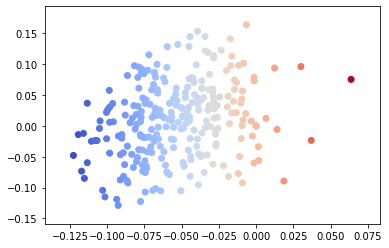

In [35]:
import matplotlib.pyplot as plt

plt.scatter(decomposition.components_[0],decomposition.components_[1], c=decomposition.components_[0], cmap="coolwarm")
plt.show()